# Appendix A:  Consideration of sample size and smoothness effects

This document aims to summarize the contributions of sample size and smoothness to random field theory (RFT) probabilities.

An RFT correction for the probability of the domain-wide maximum test statistic is given by Eqn.7 from the main manuscript:

<center>
$P(t_{\max} > u) = 1 - \exp \left[- P(t > u) \ - \ \left( \Large \frac{LKC}{2 \pi} \right)  \left(1 + \Large \frac{u^2}{\nu} \right)^{-\Large (\nu-1)/2} \right]$
</center>

where:

- $t_{\max}$ is the domain-wide maximum t-value
- $u$ is an arbitrary threshold
- LKC is the Lipschitz-Killing curvature
- $\nu$ is the degrees of freedom

The LKC is a normalized gradient estimator which is related to the more commonly reported smoothness metric: FWHM (full-width at half-maximum) as follows:

<center>
$\textrm{FWHM} =   \Large \frac{(Q-1)\sqrt{4 \log 2}}{ \textrm{LKC} }$
</center>

Increased FWHM (and decreased LKC) reflect increased smoothness. As LKC approaches zero, FWHM approaches infinity and the probability equation above simplifies to:

<center>
$P(t_{\max} > u) = 1 - \exp \left[- P(t > u) \right]$
</center>

For large $u$ (and thus small probabilities; p < 0.1) this is approximately equivalent to:

<center>
$P(t_{\max} > u) = P(t > u)$
</center>

In other words, as smoothness approaches infinity, the residuals approach constants (i.e., simple scalars) and the RFT correction $P(t_{\max} > u)$ approaches the simple scalar t-distribution case: $P(t > u)$.

This convergence with increasing FWHM is explored numerically below for different values of $u$.

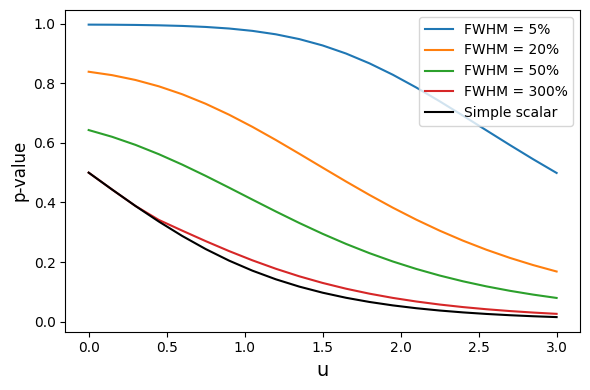

In [3]:
import numpy as np
from scipy import stats
import rft1d
import matplotlib.pyplot as plt


us    = np.linspace(0, 3, 21)
v     = 5
Q     = 101
fwhms = [5, 20, 50, 300]

p0    = np.array(  [stats.t.sf(uu, v)  for uu in us]  )
p1    = np.array(  [[rft1d.t.sf(uu, v, Q, ww) for uu in us]  for ww in fwhms]  )


fig,ax = plt.subplots(1, 1, figsize=(6,4), tight_layout=True)
for ww,pp in zip(fwhms, p1):
    ax.plot(us, pp, label=f'FWHM = {ww}%')
ax.plot(us, p0, color='k', label='Simple scalar')
ax.legend()
ax.set_xlabel('u', size=14)
ax.set_ylabel('p-value', size=12)
plt.show()

Note that this trend is independent of sample size. Above $\nu=5$ was selected, corresponding to sample size of $n$=6 for a one-sample test. Below this is raised to $\nu=49$.

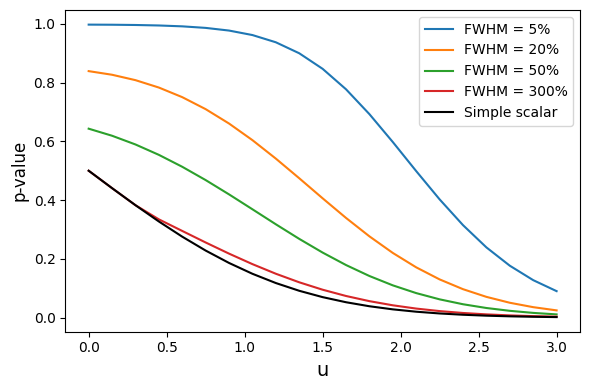

In [2]:

v     = 49
p0    = np.array(  [stats.t.sf(uu, v)  for uu in us]  )
p1    = np.array(  [[rft1d.t.sf(uu, v, Q, ww) for uu in us]  for ww in fwhms]  )

fig,ax = plt.subplots(1, 1, figsize=(6,4), tight_layout=True)
for ww,pp in zip(fwhms, p1):
    ax.plot(us, pp, label=f'FWHM = {ww}%')
ax.plot(us, p0, color='k', label='Simple scalar')
ax.legend()
ax.set_xlabel('u', size=14)
ax.set_ylabel('p-value', size=12)
plt.show()